##Diferencias Centradas
Método diferencias hacia adelante para aproximación de derivadas

In [1]:
import numpy as np
import pandas as pd
import fractions
import sympy as sp
import math 
from math import *
from math import e
from sympy import *
import matplotlib.pyplot as plt
x= symbols('x')
h= symbols('h')

In [2]:
#Imprime como fraccion
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})

In [3]:
funcion= (x**4)*e**(-x)-(x**2)*e**(-2*x)

In [10]:
def alpha_adelante(d,p):
  ne=d+p
  m0=0
  m1=ne-1
  A= np.zeros((ne, ne))
  b= np.zeros(ne)

  for i in range(ne):
    if i+1==d:
      b[i+1]=1
    for j in range(ne):
      if i == 0:
        A[i,j]= 1
      else: 
        A[i,j]= j**(i)
  a= np.linalg.solve(A,b)
  return a

In [11]:
def aprox_adelante(fx,d,p,xi,j):
  ##Calculamos la derivada
  g=diff(fx,x,d)
  g=g.subs(x,xi)

  ##Calculamos la aproximación de la derivada
  a=d+p-1
  ne=a+1
  m0=0
  m1=ne-1
  alpha=alpha_adelante(d,p)
  faprox=0
  for i in range(m1+1):
    faprox+= ((alpha[i]*(fx.subs(x,x+i*h)))*math.factorial(d))/h**d
  hi=2**(-j)
  faprox= faprox.subs(x,xi).subs(h,hi)
  E= abs(g-faprox)
  #print('derivada',d,':',g,'aproximacion:',faprox,'con precisión',p,'error:',E)
  return g,faprox,E

In [12]:
datos_adelante= []
derivada,aprox,error= aprox_adelante(funcion,4,2,-1,1)
datos_adelante.append([1,2**(-1),derivada,aprox,error])
hViejo= 2**(-1)

for i in range(2,16):
  derivada,aprox,errorN= aprox_adelante(funcion,4,2,-1,i)
  hNuevo= 2**(-i)
  alpha= log(errorN/error)/log(hNuevo/hViejo)
  datos_adelante.append([i, 2**(-i), derivada, aprox, errorN, alpha])
  error, hViejo= errorN,hNuevo
  
datos_adelante = pd.DataFrame(datos_adelante).set_axis(['j','h','ValorF', 'ApproxF', 'Error', 'Alpha'], axis=1)
datos_adelante

,j,h,ValorF,ApproxF,Error,Alpha
0,1,0.500000,-377.678278515183,-65.9304350844062,311.747843430776,None
1,2,0.250000,-377.678278515183,-169.956669211027,207.721609304155,0.585728272269434
2,3,0.125000,-377.678278515183,-284.233791810542,93.4444867046409,1.15246985623346
3,4,0.062500,-377.678278515183,-345.658998502069,32.0192800131135,1.54516867866622
4,5,0.031250,-377.678278515183,-368.260872779414,9.41740573576863,1.76553927512410
5,6,0.015625,-377.678278515183,-375.121677130461,2.55660138472194,1.88110244872899
6,7,0.007812,-377.678278515183,-377.012062072754,0.666216442428777,1.94016437302526
7,8,0.003906,-377.678278515183,-377.508529663086,0.169748852096745,1.97258914213718
8,9,0.001953,-377.678278515183,-377.637084960938,0.0411935542451829,2.04291130377122
9,10,0.000977,-377.678278515183,-377.681640625000,0.00336210981731710,3.61497985607726


In [13]:
datos_a= []
derivada,aprox,error= aprox_adelante(funcion,4,4,-1,1)
datos_a.append([1,2**(-1),derivada,aprox,error])
hViejo= 2**(-1)

for i in range(2,16):
  derivada,aprox,errorN= aprox_adelante(funcion,4,4,-1,i)
  hNuevo= 2**(-i)
  alpha= log(errorN/error)/log(hNuevo/hViejo)
  datos_a.append([i, 2**(-i), derivada, aprox, errorN, alpha])
  error, hViejo= errorN,hNuevo
  
datos_a = pd.DataFrame(datos_a).set_axis(['j','h','ValorF', 'ApproxF', 'Error', 'Alpha'], axis=1)
datos_a

,j,h,ValorF,ApproxF,Error,Alpha
0,1,0.500000,-377.678278515183,-123.235369436958,254.442909078225,None
1,2,0.250000,-377.678278515183,-292.749304934068,84.9289735811151,1.58301326691861
2,3,0.125000,-377.678278515183,-364.543980935645,13.1342975795378,2.69291776681473
3,4,0.062500,-377.678278515183,-376.368626920739,1.30965159444349,3.32608407847848
4,5,0.031250,-377.678278515183,-377.574547395110,0.103731120072553,3.65826238085030
5,6,0.015625,-377.678278515183,-377.670969009399,0.00730950578326883,3.82693110290940
6,7,0.007812,-377.678278515183,-377.677688598633,0.000589916549870395,3.63119107563654
7,8,0.003906,-377.678278515183,-377.677490234375,0.000788280807682895,-0.418198765626491
8,9,0.001953,-377.678278515183,-377.682617187500,0.00433867231731710,-2.46047207454472
9,10,0.000977,-377.678278515183,-377.500000000000,0.178278515182683,-5.36073541095798


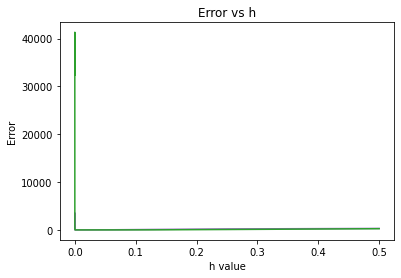

In [14]:
fig, ax = plt.subplots()
ax.plot(datos_adelante["h"],datos_adelante["Error"], color = 'tab:purple')
ax.plot(datos_a["h"],datos_a["Error"], color = 'tab:green')
plt.title("Error vs h")
plt.xlabel("h value")
plt.ylabel("Error")
plt.show()

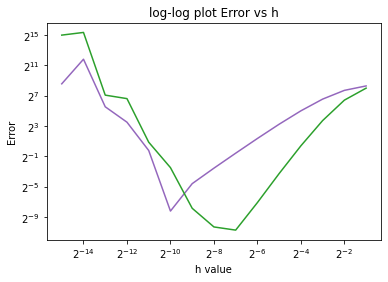

In [15]:
plt.loglog(datos_adelante["h"], datos_adelante["Error"], basex = 2, basey = 2,color = 'tab:purple')
plt.loglog(datos_a["h"], datos_a["Error"], basex = 2, basey = 2,color = 'tab:green')
plt.title("log-log plot Error vs h")
plt.xlabel("h value")
plt.ylabel("Error")
plt.show()